In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
df = pd.read_csv('Weights/Ques1/pm2.5.csv')

In [3]:
df.shape

(43824, 13)

In [4]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.drop(["No"], axis=1, inplace=True)

In [6]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [7]:
df.shape

(43824, 12)

In [8]:
df['pm2.5'].isna().sum()

2067

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(41757, 12)

In [11]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [12]:
df['cbwd'].value_counts()

SE    14573
NW    13484
cv     8944
NE     4756
Name: cbwd, dtype: int64

In [13]:
def encodeCBWD(val):
    if val == 'SE':
        return 1
    elif val == 'NW':
        return 2
    elif val == 'NE':
        return 3
    return 4

In [14]:
df['cbwd'] = df['cbwd'].apply(encodeCBWD)

In [15]:
df.shape

(41757, 12)

In [16]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,1,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,1,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,1,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,1,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,1,6.25,2,0


In [17]:
def train_test_split(df, trainSize = 0.8, testSize = 0.2, random_state = 42):
    validSize = 1 - trainSize - testSize
    indices = np.arange(df.shape[0])
    np.random.seed(random_state)
    np.random.shuffle(indices)
    trainData = df.iloc[indices[:int(trainSize*df.shape[0])]].reset_index(drop=True)
    validData = df.iloc[indices[int(trainSize*df.shape[0]):int((trainSize+validSize)*df.shape[0])]].reset_index(drop=True)
    testData = df.iloc[indices[int((trainSize+validSize)*df.shape[0]):]].reset_index(drop=True)
    if validSize == 0:
        return trainData, testData
    else:
        return trainData, validData, testData
trainData, validData, testData = train_test_split(df, trainSize = 0.70, testSize = 0.15, random_state = 0)

In [18]:
trainData.shape, validData.shape, testData.shape

((29229, 12), (6264, 12), (6264, 12))

In [19]:
trainY = trainData['month']
trainX = trainData.drop(['month'], axis=1)
validY = validData['month']
validX = validData.drop(['month'], axis=1)
testY = testData['month']
testX = testData.drop(['month'], axis=1)

In [20]:
testX.shape, trainX.shape, validX.shape, testY.shape, trainY.shape, validY.shape

((6264, 11), (29229, 11), (6264, 11), (6264,), (29229,), (6264,))

# part a

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
decisionTreeEntropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
decisionTreeEntropy.fit(trainX, trainY)
print('train', decisionTreeEntropy.score(trainX, trainY))
print('valid', decisionTreeEntropy.score(validX, validY))
print('test', decisionTreeEntropy.score(testX, testY))

train 1.0
valid 0.8333333333333334
test 0.8271072796934866


In [29]:
decisionTreeEntropy = DecisionTreeClassifier(criterion='gini', random_state=0)
decisionTreeEntropy.fit(trainX, trainY)
print('train', decisionTreeEntropy.score(trainX, trainY))
print('valid', decisionTreeEntropy.score(validX, validY))
print('test', decisionTreeEntropy.score(testX, testY))

train 1.0
valid 0.8033205619412516
test 0.80970625798212


# part b

In [24]:
depths = [2, 4, 8, 10, 15, 30]

In [25]:
testingAcc = []
trainingAcc = []
validationAcc = []

In [26]:
for depth in depths:
    decisionTreeEntropy = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    decisionTreeEntropy.fit(trainX, trainY)
    trainingAcc.append(decisionTreeEntropy.score(trainX, trainY))
    validationAcc.append(decisionTreeEntropy.score(validX, validY))
    testingAcc.append(decisionTreeEntropy.score(testX, testY))

In [27]:
plt.style.use('seaborn')
plt.style.use('ggplot')
plt.style.use('dark_background')


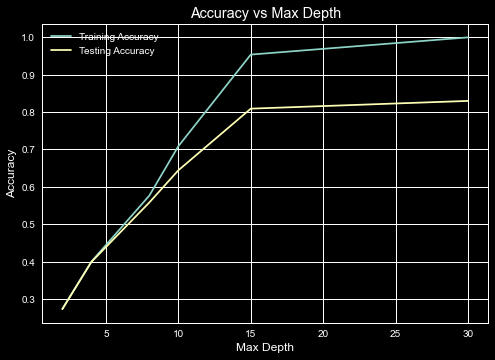

In [28]:
plt.plot(depths, trainingAcc, label='Training Accuracy')
# plt.plot(depths, validationAcc, label='Validation Accuracy')
plt.plot(depths, testingAcc, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()

# part c

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3)

In [31]:
rfc.fit(trainX, trainY)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [32]:
rfc.score(trainX, trainY), rfc.score(validX, validY), rfc.score(testX, testY)

(0.44082931335317665, 0.4353448275862069, 0.44300766283524906)

In [33]:
decisionTreeRF = DecisionTreeClassifier(criterion='entropy', max_depth=3)
predictions = []

for i in range(100):
    trainDataRF, testDataRF = train_test_split(trainData, trainSize = 0.5, testSize = 0.5, random_state = i+1)
    trainDataRF_X = trainDataRF.drop(['month'], axis=1)
    trainDataRF_y = trainDataRF['month']
    testDataRF_X = testDataRF.drop(['month'], axis=1)
    testDataRF_y = testDataRF['month']
    decisionTreeRF.fit(trainDataRF_X, trainDataRF_y)
    predictions.append(decisionTreeRF.predict(testX))


In [34]:
len(predictions), len(predictions[0])

(100, 6264)

In [35]:
pred = np.array(predictions)

In [36]:
pred.shape

(100, 6264)

In [37]:
y_ = []
for i in range(len(pred[0])):
    y_.append(np.argmax(np.bincount(pred[:,i])))

In [38]:
len(y_)

6264

In [39]:
def calcAccuracy(y_, y):
    return (y_ == y).sum()*100/len(y_)

In [40]:
calcAccuracy(y_, testY)

35.312899106002554

In [41]:
pred

array([[10,  9,  5, ...,  9,  7,  3],
       [10,  9,  5, ...,  9,  7,  3],
       [10,  9,  5, ...,  9,  7,  3],
       ...,
       [10,  9,  5, ...,  9,  7,  3],
       [10,  9,  5, ...,  9,  7,  3],
       [10,  9,  5, ...,  9,  7,  3]])

In [42]:
pred[0]

array([10,  9,  5, ...,  9,  7,  3])

In [43]:
pred.shape

(100, 6264)

In [44]:
len(y_)

6264

# part d

In [45]:
maxDepths = [4, 8, 10, 15, 20, 30]

In [48]:
trainPreds = {}
validPreds = {}
testPreds = {}
trainAccs = {}
validAccs = {}
testAccs = {}
for dep in maxDepths:
    decisionTreeRF = DecisionTreeClassifier(criterion='entropy', max_depth=dep)
    trainPreds[dep] = []
    validPreds[dep] = []
    testPreds[dep] = []
    trainAccs[dep] = []
    validAccs[dep] = []
    testAccs[dep] = []
    for i in tqdm(range(100)):
        trainDataRF, testDataRF = train_test_split(
            trainData, trainSize=0.5, testSize=0.5, random_state=i+1)
        trainDataRF_X = trainDataRF.drop(['month'], axis=1)
        trainDataRF_y = trainDataRF['month']
        testDataRF_X = testDataRF.drop(['month'], axis=1)
        testDataRF_y = testDataRF['month']
        decisionTreeRF.fit(trainDataRF_X, trainDataRF_y)
        trainPreds[dep].append(decisionTreeRF.predict(trainX))
        validPreds[dep].append(decisionTreeRF.predict(validX))
        testPreds[dep].append(decisionTreeRF.predict(testX))
        trainPred = np.array(trainPreds[dep])
        y_train = []
        for i in range(len(trainPred[0])):
            y_train.append(np.argmax(np.bincount(trainPred[:, i])))
        trainAccs[dep].append(calcAccuracy(y_train, trainY))
        testPred = np.array(testPreds[dep])
        y_test = []
        for i in range(len(testPred[0])):
            y_test.append(np.argmax(np.bincount(testPred[:, i])))
        testAccs[dep].append(calcAccuracy(y_test, testY))
        validPred = np.array(validPreds[dep])
        y_valid = []
        for i in range(len(validPred[0])):
            y_valid.append(np.argmax(np.bincount(validPred[:, i])))
        validAccs[dep].append(calcAccuracy(y_valid, validY))

100%|██████████| 100/100 [00:39<00:00,  2.52it/s]


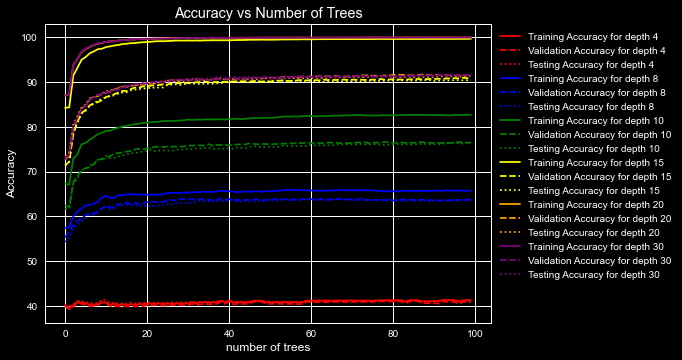

In [68]:
color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple']
ctr = 0
for i in maxDepths:
    plt.plot(trainAccs[i], label='Training Accuracy for depth ' + str(i), color=color[ctr])
    plt.plot(validAccs[i], label='Validation Accuracy for depth ' + str(i), color=color[ctr], linestyle='dashed')
    plt.plot(testAccs[i], label='Testing Accuracy for depth ' + str(i), color=color[ctr], linestyle='dotted')
    ctr += 1
plt.xlabel('number of trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# part e

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
noOfEstimators = [4, 8, 10, 15, 20]

In [71]:
dtForAda = DecisionTreeClassifier(criterion='entropy')

In [77]:
adaTrainAccs = []
adaTestAccs = []
adaValidAccs = []
for i in tqdm(range(len(noOfEstimators))):
    est = noOfEstimators[i]
    adaBoost = AdaBoostClassifier(base_estimator=dtForAda, n_estimators=est)
    adaBoost.fit(trainX, trainY)
    adaTrainAccs.append(adaBoost.score(trainX, trainY))
    adaTestAccs.append(adaBoost.score(testX, testY))
    adaValidAccs.append(adaBoost.score(validX, validY))

100%|██████████| 5/5 [00:01<00:00,  2.80it/s]


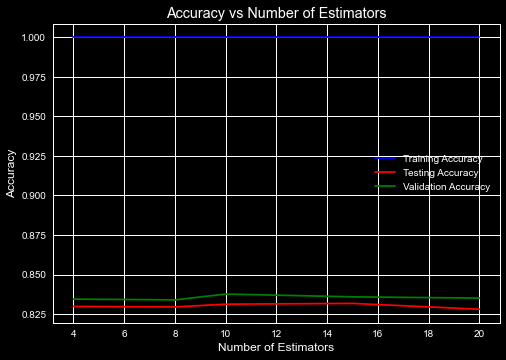

In [78]:
plt.plot(noOfEstimators, adaTrainAccs, label='Training Accuracy', color='blue')
plt.plot(noOfEstimators, adaTestAccs, label='Testing Accuracy', color='red')
plt.plot(noOfEstimators, adaValidAccs, label='Validation Accuracy', color='green')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.legend()
plt.show()